In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])

leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

In [12]:
#drop
df = gameX.copy() 
leader_df = leaderX.copy()
drop_target = ['mvar16', 'mvar17', 'mvar18']
#number of misssing values
# for i in df.columns:
#     if (100*(80000-gameDf[i].describe()['count'])/80000) > 

In [13]:
for i in drop_target:
    del df[i]
    del leader_df[i]

In [14]:
leader_df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25',
       'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32',
       'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39',
       'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46',
       'mvar47'],
      dtype='object')

In [15]:
gameX = df
leaderX = leader_df 

In [12]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,1.0,0.000000,98.497452,20.551000,0.42105,3.0,0.856610,0.070736,0.000000,0
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,3.0,0.000000,98.497452,63.047000,0.00000,15.0,0.943910,0.000000,0.000000,1
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,1.0,0.000000,98.497452,83.797000,0.33333,3.0,0.764670,0.000000,0.000000,1
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,1.0,0.090819,98.497452,72.096758,1.50000,0.0,0.705285,0.070736,0.096135,1
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,3.0,0.000000,96.052000,66.665000,0.00000,23.0,0.791900,0.000000,0.000000,0
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,4.0,0.000000,98.497452,77.780000,0.00000,21.0,0.924620,0.000000,0.000000,0
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,6.0,0.000000,98.497452,67.159000,0.00000,14.0,0.713470,0.000000,0.000000,0
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,9.0,0.000000,98.497452,72.096758,0.00000,15.0,0.924030,0.000000,0.000000,0
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,1.0,0.000000,98.497452,72.096758,0.00000,5.0,0.897600,0.000000,0.096135,0
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,9.0,0.000000,98.497452,72.096758,0.05882,14.0,0.405290,0.070736,0.000000,1


In [37]:
#LR

In [38]:
from sklearn import preprocessing as prep

scaler_list = []
for i in gameX.columns:
    scaler_list.append(prep.StandardScaler().fit(gameX[i]))
    
# prep.StandardScaler()

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [39]:
gameX_scaled = gameX.copy()

for i in enumerate(gameX_scaled.columns):
    gameX_scaled[i[1]] = scaler_list[i[0]].transform(gameX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [40]:
leaderX_scaled = leaderX.copy()

for i in enumerate(leaderX_scaled.columns):
    leaderX_scaled[i[1]] = scaler_list[i[0]].transform(leaderX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(gameX_scaled, gameY)

In [42]:
pred = clf.predict_proba(leaderX_scaled)

In [43]:
clf.coef_

array([[-0.25489326,  0.12946788, -0.03509443, -0.01381609, -0.02060193,
        -0.08473342,  0.05636283, -0.00964726,  0.06029662, -0.14283818,
        -0.00357955,  0.02237085, -0.10527316,  0.00822169, -0.04566588,
        -0.01434881,  0.10150375,  0.05277726,  0.02702809,  0.02759691,
        -0.00992782, -0.0763638 , -0.01556093,  0.00879071,  0.02044839,
        -0.03515496, -0.0243864 , -0.02264444,  0.10616095, -0.02097186,
         0.06874574,  0.01960684,  0.08600107, -0.16425699,  0.03279889,
         0.00056935,  0.02189827,  0.02468496,  0.13333062, -0.1304777 ,
        -0.03358461,  0.02625354,  0.04469924,  0.23931887]])

In [44]:
clf.coef_.shape

(1, 44)

In [14]:
#Method 3

In [15]:
#current

In [13]:
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]

print('running cross validation')

print('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    param['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold

###
# you can also do cross validation with customized loss function
# See custom_objective.py
##
print('running cross validation, with cutomsized loss function')
#Custom
# wt = 0.5
# def logregobj(preds, dtrain):
#     labels = dtrain.get_label()
#     preds = 1.0 / (1.0 + np.exp(-preds))
#     grad = wt*(1.0-labels)*preds - (1-wt)*labels*(1-preds)
#     hess = preds * (1.0 - preds) * (wt*(1.0-labels)+(1.0-wt)*labels)
#     return grad, hess

def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

t = time.time()
# CV to find optimum number of boosted trees (num_round)
# cvresult = xgb.cv(
#             param, #param set by user
#             dtrain, #train set
#             num_round, #max number of boosted tree, >early_stopping_round
#             nfold=n_fold, #n fold CV
#             seed=0, 
#             obj=logregobj, #custom loss func
#             feval=evalerror, #custom eval metric
#             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
#                        xgb.callback.early_stop(early_stopping_rounds)], #decides optimum number of boosted trees, <num_round
# #             fpreproc=fpreproc, #function for preprocessing
#             )
# num_round = cvresult.shape[0] #optimum number of boosted trees

num_round = 231
# bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror, fpreproc=fpreproc)
bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror)

print("time taken:", time.time()-t)

/home/ekka/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


running cross validation
running cross validation, with preprocessing function
running cross validation, with cutomsized loss function
[0]	eval-error:0.753788	train-error:0.753788
[1]	eval-error:0.753788	train-error:0.753788
[2]	eval-error:0.371475	train-error:0.371475
[3]	eval-error:0.28515	train-error:0.28515
[4]	eval-error:0.238987	train-error:0.238987
[5]	eval-error:0.215463	train-error:0.215463
[6]	eval-error:0.2083	train-error:0.2083
[7]	eval-error:0.205912	train-error:0.205912
[8]	eval-error:0.204137	train-error:0.204137
[9]	eval-error:0.202425	train-error:0.202425
[10]	eval-error:0.201525	train-error:0.201525
[11]	eval-error:0.200425	train-error:0.200425
[12]	eval-error:0.199462	train-error:0.199462
[13]	eval-error:0.198563	train-error:0.198563
[14]	eval-error:0.197687	train-error:0.197687
[15]	eval-error:0.198013	train-error:0.198013
[16]	eval-error:0.197187	train-error:0.197187
[17]	eval-error:0.19715	train-error:0.19715
[18]	eval-error:0.197162	train-error:0.197162
[19]	eval

[177]	eval-error:0.177762	train-error:0.177762
[178]	eval-error:0.177838	train-error:0.177838
[179]	eval-error:0.177775	train-error:0.177775
[180]	eval-error:0.177725	train-error:0.177725
[181]	eval-error:0.177625	train-error:0.177625
[182]	eval-error:0.177675	train-error:0.177675
[183]	eval-error:0.177675	train-error:0.177675
[184]	eval-error:0.1777	train-error:0.1777
[185]	eval-error:0.17765	train-error:0.17765
[186]	eval-error:0.177588	train-error:0.177588
[187]	eval-error:0.177537	train-error:0.177537
[188]	eval-error:0.177475	train-error:0.177475
[189]	eval-error:0.177437	train-error:0.177437
[190]	eval-error:0.17735	train-error:0.17735
[191]	eval-error:0.177237	train-error:0.177237
[192]	eval-error:0.177125	train-error:0.177125
[193]	eval-error:0.177063	train-error:0.177063
[194]	eval-error:0.176937	train-error:0.176937
[195]	eval-error:0.176937	train-error:0.176937
[196]	eval-error:0.17685	train-error:0.17685
[197]	eval-error:0.176737	train-error:0.176737
[198]	eval-error:0.1767

In [15]:
#910k
import xgboost as xgb
import time

dtrain = xgb.DMatrix(gameX, gameY)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

num_round = 231

bst = xgb.train(param, dtrain, num_round, obj=logregobj, feval=evalerror)

NameError: name 'logregobj' is not defined

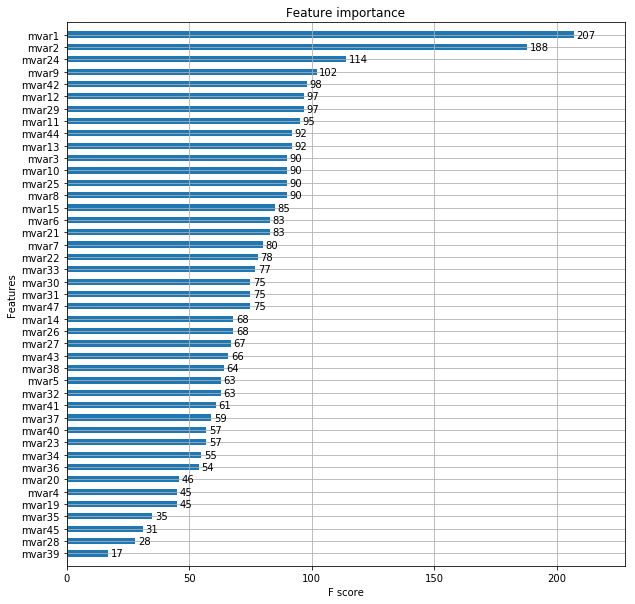

In [18]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

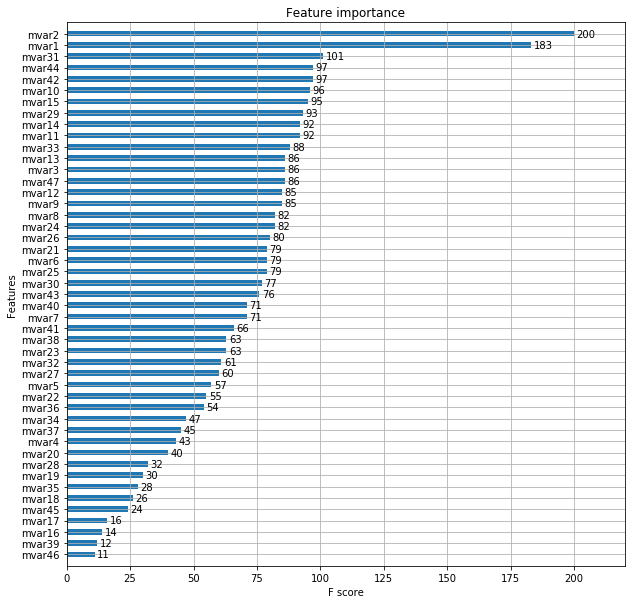

In [17]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

In [14]:
bst.predict(dtrain)

array([-0.68191946, -2.32880068, -1.17024517, ...,  0.80745357,
       -1.74727559, -0.73057234], dtype=float32)

In [15]:
1/(1+np.exp(-bst.predict(dtrain)))

array([ 0.33583304,  0.08876563,  0.23681067, ...,  0.69156659,
        0.14839116,  0.32506913], dtype=float32)

In [16]:
dtest = xgb.DMatrix(leaderX)
# pred = bst.predict(leaderXxgb)

In [17]:
pred = 1/(1+np.exp(-bst.predict(dtest)))

In [18]:
pred = pd.DataFrame(pred)
pred['application_key'] = leaderAppID
pred.shape

(25000, 2)

In [19]:
pred

,0,application_key
0,0.049399,350053
1,0.043730,350054
2,0.118523,350055
3,0.647329,350056
4,0.108382,350057
5,0.005246,350058
6,0.057219,350059
7,0.003039,350060
8,0.007012,350061
9,0.212490,350062


In [20]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

# pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = False)

In [21]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [22]:
pred = pred.loc[:,'application_key':]

In [23]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [24]:
# submit.iloc[-400:, 1] = 1

In [25]:
submit

,application_key,0
49,350102,0
13522,363575,0
20330,370383,0
124,350177,0
13648,363701,0
22865,372918,0
193,350246,0
22263,372316,0
6084,356137,0
11141,361194,0


In [26]:
submit.to_csv('flabbergasted_IITGuwahati_222.csv',header = False, index = False)